In [32]:
import pandas as pd
import numpy as np

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
df = pd.read_excel(file_path, sheet_name='ranking_position', skiprows=7)

display(df.head())

,Unnamed: 0,date,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,...,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00
0,Best Comission-Free Accounts (Helmycash),Cuenta Online sin comisiones BBVA,1.0,1.0,1.0,NaN,NaN,1.0,8.0,3.0,...,NaN,NaN,NaN,4.0,6.0,NaN,NaN,4.176471,3.193548,4.035714
1,NaN,Cuenta Nómina ING,2.0,2.0,2.0,NaN,NaN,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Cuenta Nómina hasta 5% TAE Bankinter,3.0,3.0,3.0,NaN,NaN,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Cuenta Clara ABANCA,4.0,4.0,4.0,NaN,NaN,4.0,6.0,6.0,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.470588,5.354839,4.064516
4,NaN,Cuenta Online SIN Liberbank,5.0,5.0,5.0,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')

# Rename the columns for clarity:
df.columns = ['Category', 'Bank Name'] + list(df.columns[2:])

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_12720\2703216551.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')


In [14]:
transformed_df = pd.melt(df, id_vars=['Category', 'Bank Name'], var_name='Date', value_name='Rank')
transformed_df['Date'] = pd.to_datetime(transformed_df['Date'])
print(transformed_df.head())

                                   Category  \
0  Best Comission-Free Accounts (Helmycash)   
1  Best Comission-Free Accounts (Helmycash)   
2  Best Comission-Free Accounts (Helmycash)   
3  Best Comission-Free Accounts (Helmycash)   
4  Best Comission-Free Accounts (Helmycash)   

                              Bank Name       Date  Rank  
0     Cuenta Online sin comisiones BBVA 2021-12-01   1.0  
1                    Cuenta Nómina ING  2021-12-01   2.0  
2  Cuenta Nómina hasta 5% TAE Bankinter 2021-12-01   3.0  
3                   Cuenta Clara ABANCA 2021-12-01   4.0  
4           Cuenta Online SIN Liberbank 2021-12-01   5.0  


### Imputing with 0 value

In [15]:
#transformed_df['Rank'] = transformed_df['Rank'].fillna(0)
#transformed_df.isna().sum()

In [16]:
'''
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Convert date to a numerical format if not already done
transformed_df['Date'] = pd.to_datetime(transformed_df['Date']).astype(np.int64)

# Ensure that 'Category' and 'Bank Name' are not included if they are non-numeric without encoding
# For simplicity here, we only use numeric columns (assuming Date has been transformed to numeric)
df_for_imputation = transformed_df[['Date', 'Rank']]

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
df_for_imputation['Rank'] = imputer.fit_transform(df_for_imputation)

# Merge or replace the original 'Rank' column
transformed_df['Rank'] = df_for_imputation['Rank']

# Check for any remaining missing values
print(transformed_df.isnull().sum())

'''

"\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimport numpy as np\n\n# Convert date to a numerical format if not already done\ntransformed_df['Date'] = pd.to_datetime(transformed_df['Date']).astype(np.int64)\n\n# Ensure that 'Category' and 'Bank Name' are not included if they are non-numeric without encoding\n# For simplicity here, we only use numeric columns (assuming Date has been transformed to numeric)\ndf_for_imputation = transformed_df[['Date', 'Rank']]\n\n# Initialize the IterativeImputer\nimputer = IterativeImputer(max_iter=10, random_state=0)\n\n# Fit and transform the data\ndf_for_imputation['Rank'] = imputer.fit_transform(df_for_imputation)\n\n# Merge or replace the original 'Rank' column\ntransformed_df['Rank'] = df_for_imputation['Rank']\n\n# Check for any remaining missing values\nprint(transformed_df.isnull().sum())\n\n"

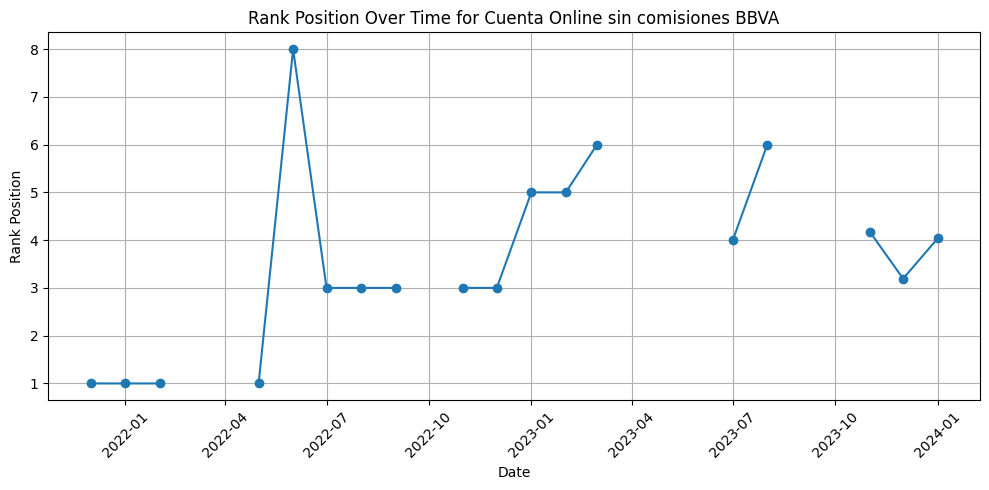

In [17]:
import matplotlib.pyplot as plt

# Example for plotting data for a specific bank and category
bank_data = transformed_df[(transformed_df['Bank Name'] == 'Cuenta Online sin comisiones BBVA') &
                           (transformed_df['Category'] == 'Best Comission-Free Accounts (Helmycash)')]

plt.figure(figsize=(10, 5))
plt.plot(bank_data['Date'], bank_data['Rank'], marker='o', linestyle='-')
plt.title('Rank Position Over Time for Cuenta Online sin comisiones BBVA')
plt.xlabel('Date')
plt.ylabel('Rank Position')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
summary = transformed_df['Rank'].describe()
print(summary)

count    470.000000
mean       4.937191
std        2.649911
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       11.000000
Name: Rank, dtype: float64


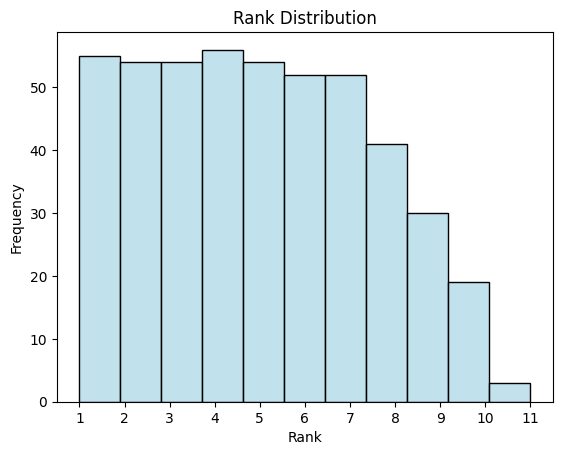

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(transformed_df['Rank'], bins=11, color='lightblue', edgecolor='black', kde=False)
plt.title('Rank Distribution')
plt.xlabel('Rank')
plt.ylabel('Frequency')

# Set the ticks on the x-axis to cover all ranks from 1 to 11
plt.xticks(np.arange(1, 12, step=1))  # This sets ticks at every integer from 1 to 11

plt.show()

We are able to observed that for rank above 7 is uniform distributed, whereas others are

#### Category

In [20]:
# Extract bank names and categories
bank_names = df.iloc[0:, 1]  # Bank names are in the second column starting from the second row
categories = df.iloc[0:, 0]  # Categories are in the first column for each bank


filled_categories = categories.fillna(method='ffill')

combined_df = pd.DataFrame({
    'Category': filled_categories,
    'Bank Name': bank_names
})

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_12720\3609543098.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_categories = categories.fillna(method='ffill')


In [21]:
value_counts = combined_df['Bank Name'].value_counts()
print(value_counts)

# Descriptive statistics for a categorical column
cat_summary = combined_df['Bank Name'].describe()
print(cat_summary)

Bank Name
Cuenta Nómina hasta 5% TAE Bankinter               3
Cuenta Clara ABANCA                                3
Cuenta Online SIN Liberbank                        2
Cuenta Nómina ING                                  2
Cuenta Inteligente Bienvenida EVO Banco            2
Cuenta Online Sabadell                             2
Cuenta Online sin comisiones BBVA                  1
Cuenta de Ahorro Bank Norwegian                    1
Cuenta de Ahorro Online Nationale Nederlanden      1
Cuenta de Ahorro Progretto                         1
Cuenta Naranja ING                                 1
Cuenta de Ahorro BraBank                           1
Cuenta de Ahorro Lea Bank                          1
Cuenta PlayStation Unicaja Banco                   1
Cuenta Vamos Ibercaja                              1
Cuenta de Ahorro Klarna                            1
Cuenta Ahorro Trade Republic                       1
Cuenta Contigo Renault Bank                        1
Cuenta Día a Día Caixabank          